In [10]:

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [97]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [99]:
len(X_train)#num of image(x)
 


60000

In [21]:
len(x_test)

10000

In [24]:
X_train[0].shape #row*column for the first image 

(28, 28)

In [25]:
X_train[0] #matrix of the first image 

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

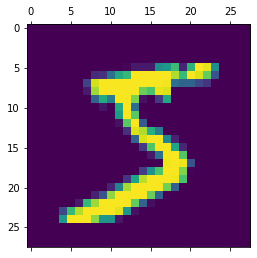

In [27]:
plt.matshow(X_train[0]) #5
#This is mostly used to visualize the 2D matrix. It will show same color for the same number inside matrix.

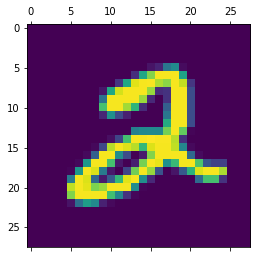

In [43]:
plt.matshow(X_train[5]) #2

In [100]:
y_train[0]

5

In [102]:
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [101]:
X_train = X_train / 255
X_test = X_test / 255

In [104]:
X_train_flattened = X_train.reshape(len(X_train),28*28)#حولتها لمصفوفه واحده فيها 784صف
X_test_flattened = X_test.reshape(len(X_test), 28*28)



In [105]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [84]:
X_train_flattened.shape

(60000, 784)

In [ ]:
#creat neural network has 784 neuron and 10 output (0-9)

In [106]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])
#pass parameters to model 
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4694 - accuracy: 0.8786
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3040 - accuracy: 0.9149
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2837 - accuracy: 0.9212
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2734 - accuracy: 0.9242
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2666 - accuracy: 0.9257


In [107]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2648 - accuracy: 0.9271


[0.264849990606308, 0.9271000027656555]

In [126]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 3s 2ms/step


array([3.4027644e-03, 7.3481578e-04, 1.4101487e-01, 9.2797971e-01,
       9.4223979e-06, 1.8066318e-01, 7.5235597e-08, 9.9998051e-01,
       3.6137465e-02, 4.5062566e-01], dtype=float32)

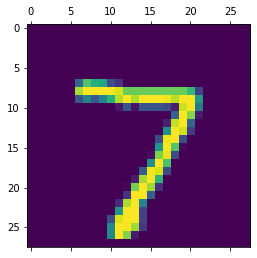

In [128]:
plt.matshow(X_test[0])


In [127]:
#اعلي قيمه في المصفوفه من العشر قيم هتبقي هي القيمه المتوقعه
#هجيبها بقي بلفانكشن argmax
np.argmax(y_predicted[0])

7

In [120]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]


In [117]:
y_predicted_labels[:5]


[7, 2, 1, 0, 4]

In [121]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    2,    2,    0,    5,    5,    3,    2,    0],
       [   0, 1113,    3,    2,    0,    1,    4,    2,   10,    0],
       [   4,    9,  925,   20,    7,    4,   10,   11,   40,    2],
       [   1,    0,   17,  918,    1,   30,    1,   12,   23,    7],
       [   1,    1,    5,    1,  917,    0,    9,    5,    9,   34],
       [   7,    3,    3,   21,   11,  791,   11,    7,   32,    6],
       [  10,    3,    9,    1,    8,   15,  907,    2,    3,    0],
       [   1,    6,   21,    7,    7,    0,    0,  952,    2,   32],
       [   5,    7,    7,   18,    9,   26,    8,   11,  876,    7],
       [   9,    7,    1,   10,   26,    7,    0,   27,   11,  911]])>

Text(69.0, 0.5, 'Truth')

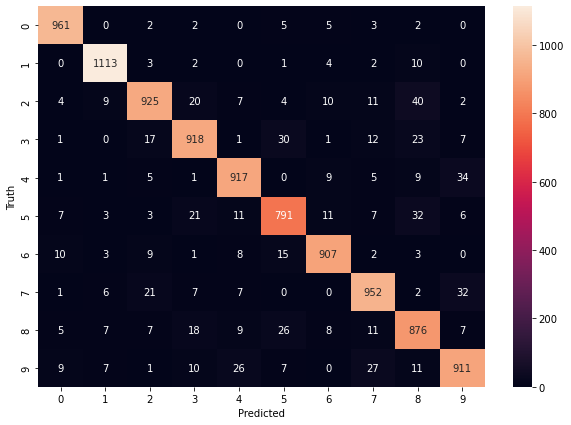

In [123]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [124]:
#Using hidden layer
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2813 - accuracy: 0.9205
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1322 - accuracy: 0.9604
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0919 - accuracy: 0.9728
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0696 - accuracy: 0.9791
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0558 - accuracy: 0.9833


In [125]:
#accuracy is increse when increse layer 
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0796 - accuracy: 0.9748


[0.07957828044891357, 0.9747999906539917]